In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__

'0.20.3'

In [3]:
data_train=pd.read_csv('train_data.csv')
data_test=pd.read_csv('test_data.csv')

In [4]:
print("The shape of the Training set: ", data_train.shape)
print("The shape of the Testing set: ", data_test.shape)

The shape of the Training set:  (169307, 43)
The shape of the Testing set:  (91166, 42)


In [5]:
data_train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,511,511,255,255,2


In [6]:
data_test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
0,cxcon_2,0,331,6085,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,13,13,255,255
1,cxcon_5,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
2,cxcon_8,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255
3,cxcon_11,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,510,509,255,255
4,cxcon_14,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,511,511,255,255


In [7]:
data_train.isnull().sum()

connection_id    0
cont_1           0
cont_2           0
cont_3           0
cont_4           0
cont_5           0
cont_6           0
cont_7           0
cont_8           0
cont_9           0
cont_10          0
cont_11          0
cont_12          0
cont_13          0
cont_14          0
cont_15          0
cont_16          0
cont_17          0
cont_18          0
cat_1            0
cat_2            0
cat_3            0
cat_4            0
cat_5            0
cat_6            0
cat_7            0
cat_8            0
cat_9            0
cat_10           0
cat_11           0
cat_12           0
cat_13           0
cat_14           0
cat_15           0
cat_16           0
cat_17           0
cat_18           0
cat_19           0
cat_20           0
cat_21           0
cat_22           0
cat_23           0
target           0
dtype: int64

In [8]:
data_test.isnull().sum()

connection_id    0
cont_1           0
cont_2           0
cont_3           0
cont_4           0
cont_5           0
cont_6           0
cont_7           0
cont_8           0
cont_9           0
cont_10          0
cont_11          0
cont_12          0
cont_13          0
cont_14          0
cont_15          0
cont_16          0
cont_17          0
cont_18          0
cat_1            0
cat_2            0
cat_3            0
cat_4            0
cat_5            0
cat_6            0
cat_7            0
cat_8            0
cat_9            0
cat_10           0
cat_11           0
cat_12           0
cat_13           0
cat_14           0
cat_15           0
cat_16           0
cat_17           0
cat_18           0
cat_19           0
cat_20           0
cat_21           0
cat_22           0
cat_23           0
dtype: int64

In [9]:
data_train["target"].value_counts()

0    98868
2    36854
1    33585
Name: target, dtype: int64

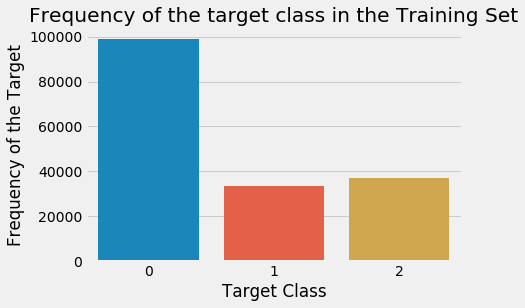

In [10]:
import matplotlib.style as style
style.use('fivethirtyeight')
sns.countplot(x="target", data=data_train)
plt.title('Frequency of the target class in the Training Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')

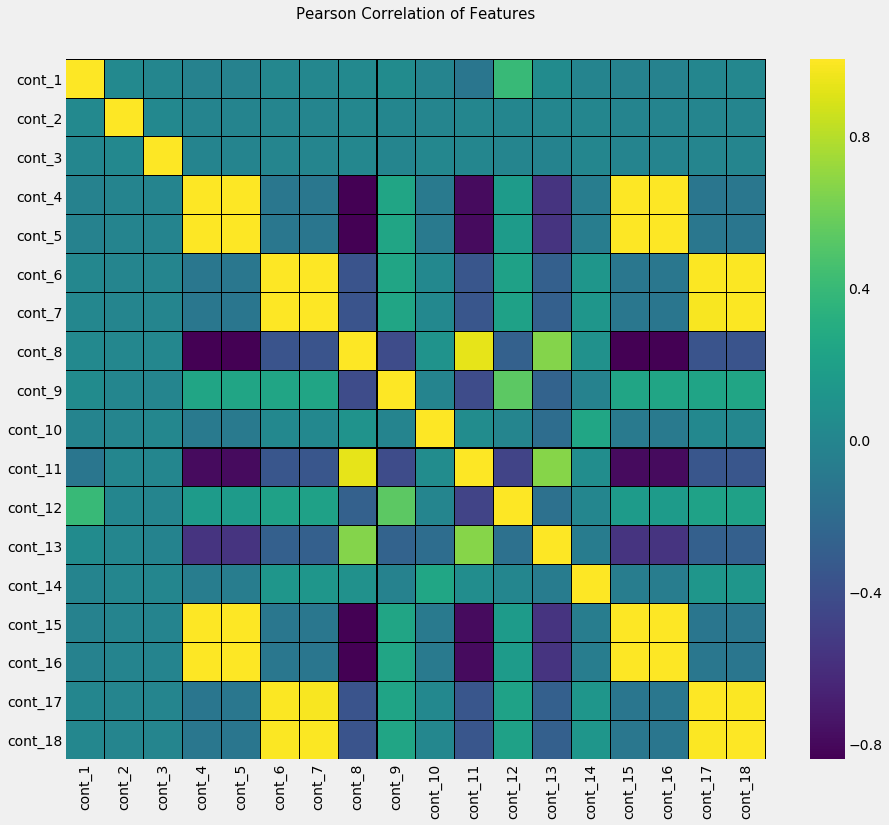

In [11]:
data_train_num=data_train.drop(['connection_id','cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7','cat_8','cat_9','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19','cat_20','cat_21','cat_22','cat_23','target'],axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_train_num.astype(float).corr(),linewidths=0.05,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=False)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
data_train_num_scld=StandardScaler().fit_transform(data_train_num)

In [14]:
pca=PCA()
data_train_num_trf=pca.fit_transform(data_train_num_scld)

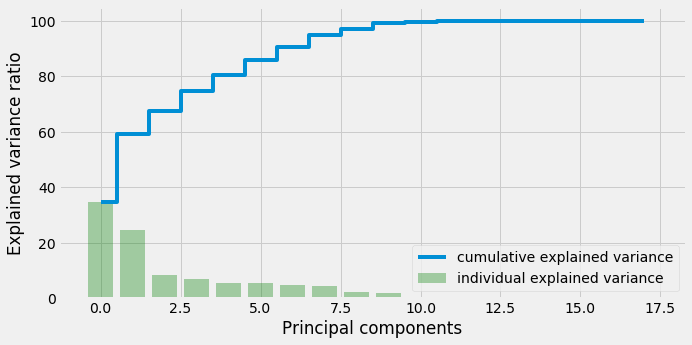

In [15]:
var=(pca.explained_variance_)
tot=sum(var)
var_exp = [(i/tot)*100 for i in sorted(var, reverse=True)] # Individual explained variance

exp_var_ratio=pca.explained_variance_ratio_
cum_var=np.cumsum(exp_var_ratio*100)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(18), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(18), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [16]:
pca=PCA(n_components=10)
data_train_num_trf_10d=pca.fit_transform(data_train_num_scld)

In [17]:
data_train_pca=pd.DataFrame(data_train_num_trf_10d,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [18]:
del data_train_num_trf
del data_train_num_trf_10d

In [19]:
data_train_pca['target']=data_train['target']

In [20]:
data_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,2
1,-1.526767,-0.273085,0.055472,-0.371114,-0.022053,-0.003077,-0.022022,0.121603,-0.255331,0.120371,0
2,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,0
3,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,0
4,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,2


In [21]:
data_train_cat=pd.DataFrame(data_train,columns=['cat_1','cat_2','cat_3','cat_4','cat_5','cat_6','cat_7','cat_8','cat_9','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19','cat_20','cat_21','cat_22','cat_23'],dtype=str)

In [22]:
data_train_cat.head()

,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,...,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23
0,3,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,511,511,255,255
1,3,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,511,511,255,255
2,3,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,511,511,255,255
3,3,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,511,511,255,255
4,3,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,511,511,255,255


In [23]:
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169307 entries, 0 to 169306
Data columns (total 23 columns):
cat_1     169307 non-null object
cat_2     169307 non-null object
cat_3     169307 non-null object
cat_4     169307 non-null object
cat_5     169307 non-null object
cat_6     169307 non-null object
cat_7     169307 non-null object
cat_8     169307 non-null object
cat_9     169307 non-null object
cat_10    169307 non-null object
cat_11    169307 non-null object
cat_12    169307 non-null object
cat_13    169307 non-null object
cat_14    169307 non-null object
cat_15    169307 non-null object
cat_16    169307 non-null object
cat_17    169307 non-null object
cat_18    169307 non-null object
cat_19    169307 non-null object
cat_20    169307 non-null object
cat_21    169307 non-null object
cat_22    169307 non-null object
cat_23    169307 non-null object
dtypes: object(23)
memory usage: 29.7+ MB


In [24]:
for col_name in data_train_cat.columns:
    if data_train_cat[col_name].dtype=='object':
        unique_cat=len(data_train_cat[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- cat_1 has 3 unique categories
Feature:- cat_2 has 64 unique categories
Feature:- cat_3 has 11 unique categories
Feature:- cat_4 has 2 unique categories
Feature:- cat_5 has 3 unique categories
Feature:- cat_6 has 2 unique categories
Feature:- cat_7 has 18 unique categories
Feature:- cat_8 has 2 unique categories
Feature:- cat_9 has 2 unique categories
Feature:- cat_10 has 11 unique categories
Feature:- cat_11 has 2 unique categories
Feature:- cat_12 has 3 unique categories
Feature:- cat_13 has 10 unique categories
Feature:- cat_14 has 10 unique categories
Feature:- cat_15 has 3 unique categories
Feature:- cat_16 has 6 unique categories
Feature:- cat_17 has 1 unique categories
Feature:- cat_18 has 2 unique categories
Feature:- cat_19 has 2 unique categories
Feature:- cat_20 has 439 unique categories
Feature:- cat_21 has 393 unique categories
Feature:- cat_22 has 256 unique categories
Feature:- cat_23 has 256 unique categories


In [25]:
print(data_train_cat['cat_2'].value_counts().sort_values(ascending=False).head(5))
print(data_train_cat['cat_20'].value_counts().sort_values(ascending=False).head(20))

10    96680
13    38366
1     21576
2      3446
11     2448
Name: cat_2, dtype: int64
511    77311
1      13506
510     9252
2       3794
509     2094
3       2047
4       1730
5       1433
6       1255
7       1147
8        943
9        873
10       866
11       787
12       720
13       644
14       556
508      516
15       492
16       469
Name: cat_20, dtype: int64


In [26]:
print(data_train_cat['cat_7'].value_counts().sort_values(ascending=False))
print(data_train_cat['cat_21'].value_counts().sort_values(ascending=False).head(20))
print(data_train_cat['cat_22'].value_counts().sort_values(ascending=False).head(20))
print(data_train_cat['cat_23'].value_counts().sort_values(ascending=False).head(20))

0     168972
2        147
1         49
6         33
4         29
5         15
19        10
28         9
14         9
22         8
30         8
3          5
24         5
18         4
10         1
21         1
13         1
20         1
Name: cat_7, dtype: int64
511    76871
1      13019
510     9353
2       6211
3       3852
4       3349
5       3035
6       2911
7       2837
8       2640
10      2635
9       2611
11      2545
12      2517
13      2438
14      2391
16      2246
17      2235
15      2227
18      2202
Name: cat_21, dtype: int64
255    148789
1         870
2         677
3         458
4         379
5         335
6         319
7         292
8         283
9         274
10        265
11        255
12        242
15        221
14        219
13        215
16        207
17        206
18        186
23        186
Name: cat_22, dtype: int64
255    115863
1        4139
2        2321
3        1989
4        1917
6        1899
12       1872
9        1862
10       1849
7        1846
5     

In [27]:
threshold = 5000 # Anything that occurs less than this will be removed.
for col in data_train_cat.columns:
    vc = data_train_cat[col].value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    data_train_cat[col].loc[data_train_cat[col].isin(vals_to_remove)] = 'other'

In [28]:
print(data_train_cat['cat_7'].value_counts().sort_values(ascending=False))
print(data_train_cat['cat_21'].value_counts().sort_values(ascending=False))
print(data_train_cat['cat_22'].value_counts().sort_values(ascending=False))
print(data_train_cat['cat_23'].value_counts().sort_values(ascending=False))

0        168972
other       335
Name: cat_7, dtype: int64
511      76871
other    63853
1        13019
510       9353
2         6211
Name: cat_21, dtype: int64
255      148789
other     20518
Name: cat_22, dtype: int64
255      115863
other     53444
Name: cat_23, dtype: int64


In [29]:
for col_name in data_train_cat.columns:
    if data_train_cat[col_name].dtype=='object':
        unique_cat=len(data_train_cat[col_name].unique())
        print("Feature:- {col_name} has {unique_cat} unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature:- cat_1 has 3 unique categories
Feature:- cat_2 has 4 unique categories
Feature:- cat_3 has 4 unique categories
Feature:- cat_4 has 2 unique categories
Feature:- cat_5 has 2 unique categories
Feature:- cat_6 has 2 unique categories
Feature:- cat_7 has 2 unique categories
Feature:- cat_8 has 2 unique categories
Feature:- cat_9 has 2 unique categories
Feature:- cat_10 has 2 unique categories
Feature:- cat_11 has 2 unique categories
Feature:- cat_12 has 2 unique categories
Feature:- cat_13 has 2 unique categories
Feature:- cat_14 has 2 unique categories
Feature:- cat_15 has 2 unique categories
Feature:- cat_16 has 2 unique categories
Feature:- cat_17 has 1 unique categories
Feature:- cat_18 has 2 unique categories
Feature:- cat_19 has 2 unique categories
Feature:- cat_20 has 4 unique categories
Feature:- cat_21 has 5 unique categories
Feature:- cat_22 has 2 unique categories
Feature:- cat_23 has 2 unique categories


In [30]:
data_train_cat_dummied=pd.get_dummies(data_train_cat)

In [31]:
print('The shape of Catageroical data: ',data_train_cat_dummied.shape)

The shape of Catageroical data:  (169307, 55)


In [32]:
del data_train_cat

In [33]:
data_train_processed=pd.concat([data_train_pca,data_train_cat_dummied],axis=1)

In [34]:
print('The shape of preprocessed training data: ',data_train_processed.shape)

The shape of preprocessed training data:  (169307, 66)


In [35]:
data_train_processed.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,cat_20_other,cat_21_1,cat_21_2,cat_21_510,cat_21_511,cat_21_other,cat_22_255,cat_22_other,cat_23_255,cat_23_other
0,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,...,0,0,0,0,1,0,1,0,1,0
1,-1.526767,-0.273085,0.055472,-0.371114,-0.022053,-0.003077,-0.022022,0.121603,-0.255331,0.120371,...,0,0,0,0,1,0,1,0,1,0
2,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,...,0,0,0,0,1,0,1,0,1,0
3,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,...,0,0,0,0,1,0,1,0,1,0
4,-1.526824,-0.273090,0.055980,-0.370688,-0.013640,-0.011342,-0.023437,0.121546,-0.255491,0.120225,...,0,0,0,0,1,0,1,0,1,0


In [36]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score

In [38]:
X_train_pre=data_train_processed.drop('target',axis=1)
Y_train_pre=data_train_processed['target']

In [39]:
X_train,X_cv_test,Y_train,Y_cv_test=train_test_split(X_train_pre,Y_train_pre,test_size=0.2,stratify=Y_train_pre,random_state=0)

In [40]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,Y_train)
rf_pred_cv=rf.predict(X_cv_test)

In [41]:
print('The accuracy of the classifier: ',accuracy_score(Y_cv_test,rf_pred_cv))

The accuracy of the classifier:  0.775943535527


In [44]:
import xgboost as xgb #learning_rate = 0.02,
gbm = xgb.XGBClassifier(n_estimators= 500,max_depth= 4,min_child_weight= 2,gamma=0.9,subsample=0.8,colsample_bytree=0.8,objective= 'multi:softprob',nthread= -1,scale_pos_weight=1).fit(X_train.values, Y_train.values.ravel())

In [47]:
predictions = gbm.predict(X_cv_test.values)

In [ ]:
from sklearn.model_selection import StratifiedKFold,KFold

num_train = X_train.shape[0]
num_test = X_cv_test.shape[0]
SEED = 0 # for same randomized reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
skf = StratifiedKFold(n_splits=NFOLDS, random_state=SEED)
#kf = KFold(n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier

class Sklearn_Rep(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    


In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((num_train,))
    oof_test = np.zeros((num_test,))
    oof_test_skf = np.empty((NFOLDS, num_test))

    for i,(train_index, test_index) in enumerate(skf.split(x_train,y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test

In [ ]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [ ]:
# Create 5 objects that represent our 4 models
rf = Sklearn_Rep(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = Sklearn_Rep(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = Sklearn_Rep(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = Sklearn_Rep(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)

In [ ]:
X_train.reset_index(inplace=True)
X_cv_test.reset_index(inplace=True)
#rf_oof_train, rf_oof_test = get_oof(rf,X_train, Y_train, X_cv_test) # Random Forest

In [ ]:
Y_train=Y_train.reset_index()

In [ ]:
Y_train.drop('index',axis=1,inplace=True)

In [ ]:
#et_oof_train, et_oof_test = get_oof(et, X_train.values, Y_train.values.ravel(), X_cv_test.values) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf, X_train.values, Y_train.values.ravel(), X_cv_test.values) # Random Forest
#ada_oof_train, ada_oof_test = get_oof(ada,  X_train.values, Y_train.values.ravel(), X_cv_test.values) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb, X_train.values, Y_train.values.ravel(), X_cv_test.values) # Gradient Boost
print('Training_Complete')

In [ ]:
#base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel()})

In [ ]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

In [48]:
print('The accuracy of the classifier: ',accuracy_score(Y_cv_test,predictions))

The accuracy of the classifier:  0.780461874668
